In [7]:
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing as skpreprocessing
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, HuberRegressor, ElasticNet, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from pylab import rcParams

cwd = os.getcwd()
output_dir = os.path.join(cwd, "../../data")
df = pd.read_csv(os.path.join(output_dir, "combined_figlet.csv"))
medium = pd.read_csv(os.path.join(output_dir, "miniodb_medium.csv"))
large = pd.read_csv(os.path.join(output_dir, "miniodb_large.csv"))
xlarge = pd.read_csv(os.path.join(output_dir, "miniodb_xlarge.csv"))
twoxlarge = pd.read_csv(os.path.join(output_dir, "miniodb_2xlarge.csv"))
figletmedium = pd.read_csv(os.path.join(output_dir, "figlet_medium.csv"))
figletlarge = pd.read_csv(os.path.join(output_dir, "figlet_large.csv"))
figlet2xlarge = pd.read_csv(os.path.join(output_dir, "figlet_2xlarge.csv"))
figletxlarge = pd.read_csv(os.path.join(output_dir, "figlet_xlarge.csv"))
qfmedium = pd.read_csv(os.path.join(output_dir, "qf_medium.csv"))
qflarge = pd.read_csv(os.path.join(output_dir, "qf_large.csv"))
qfxlarge = pd.read_csv(os.path.join(output_dir, "qf_xlarge.csv"))
qftwoxlarge = pd.read_csv(os.path.join(output_dir, "qf_2xlarge.csv"))
senmedium = pd.read_csv(os.path.join(output_dir, "sen_medium.csv"))
senlarge = pd.read_csv(os.path.join(output_dir, "sen_large.csv"))
senxlarge = pd.read_csv(os.path.join(output_dir, "sen_xlarge.csv"))
sen2xlarge = pd.read_csv(os.path.join(output_dir, "sen_2xlarge.csv"))
#df_test = pd.read_csv(os.path.join(output_dir, "figlet1599056546.006096_1599063766.431225.csv"))
df.head()

,Time,cpu,diskio,diskioRead,diskioWritten,mem,networkReceived,networkTransmitted,replica,requests,responsetime,totalcpu,totalcpuUtilization,totalmemory,totalmemoryUtilization
0,2020-10-02 17:49:59.787,0.324094,0.006131,911.319040,49312.485831,0.010610,1355.186590,7327.460939,1.0,103.0,0.101562,6.0,65.278711,2.508814e+10,19.192693
1,2020-10-02 17:50:14.787,0.435870,0.012711,12652.088889,99214.222222,0.010610,5997.000000,17316.288889,1.0,251.0,0.103955,6.0,65.278711,2.508814e+10,19.192693
2,2020-10-02 17:50:29.787,0.468027,0.012978,12652.088889,101398.755556,0.033712,8108.177778,21682.377778,1.0,396.0,0.106485,6.0,11.526728,2.508814e+10,19.333974
3,2020-10-02 17:50:44.787,0.465293,0.014400,11832.888889,128341.333333,0.033712,9869.933333,22551.844444,1.0,542.0,0.105202,6.0,11.526728,2.508814e+10,19.333974
4,2020-10-02 17:50:59.787,0.461566,0.010489,0.000000,90294.044444,0.037694,7584.933333,18696.533333,1.0,585.0,0.102712,6.0,11.493428,2.508814e+10,19.054890


In [37]:
pd.unique(df['totalcpu'])

array([ 6., 12.,  4., 24.])

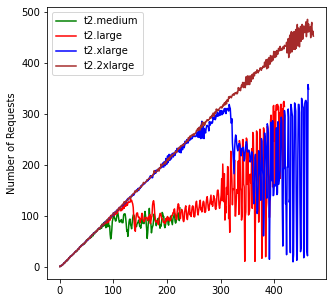

In [38]:
rcParams['figure.figsize'] = 5, 5
rcParams["legend.loc"] = 'upper left'
rcParams['axes.labelsize'] = 10
rcParams['axes.titlesize'] = 5
rcParams["font.size"] = 10
plt.plot(range(0,len(medium['requests'])),medium['requests'], color='green',label='t2.medium')
plt.plot(range(0,len(large['requests'])),large['requests'], color='red', label='t2.large')
plt.plot(range(0,len(xlarge['requests'])),xlarge['requests'], color='blue', label='t2.xlarge')
plt.plot(range(0,len(twoxlarge['requests'])),twoxlarge['requests'], color='brown', label='t2.2xlarge')
plt.legend(loc="upper left")
plt.ylabel('Number of Requests')
plt.show()

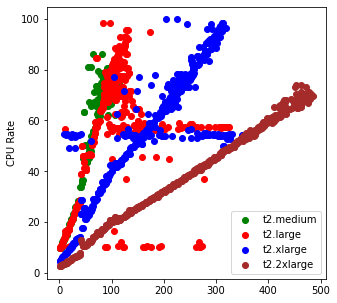

In [39]:
rcParams['figure.figsize'] = 5, 5
rcParams["legend.loc"] = 'upper left'
rcParams['axes.labelsize'] = 10
rcParams['axes.titlesize'] = 5
rcParams["font.size"] = 10
plt.scatter(medium['requests'],medium['totalcpuUtilization'], color='green',label='t2.medium')
plt.scatter(large['requests'],large['totalcpuUtilization'], color='red', label='t2.large')
plt.scatter(xlarge['requests'],xlarge['totalcpuUtilization'], color='blue', label='t2.xlarge')
plt.scatter(twoxlarge['requests'],twoxlarge['totalcpuUtilization'], color='brown', label='t2.2xlarge')
plt.legend(loc="lower right")
plt.ylabel('CPU Rate')
plt.show()

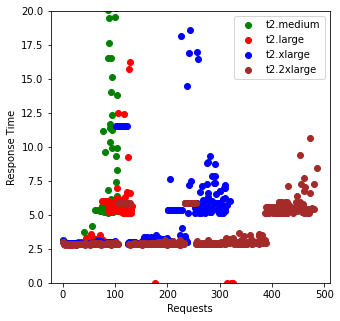

In [40]:
rcParams['figure.figsize'] = 5, 5
rcParams["legend.loc"] = 'upper left'
rcParams['axes.labelsize'] = 10
rcParams['axes.titlesize'] = 5
rcParams["font.size"] = 10
plt.scatter(medium['requests'],medium['responsetime'], color='green',label='t2.medium')
plt.scatter(large['requests'],large['responsetime'], color='red', label='t2.large')
plt.scatter(xlarge['requests'],xlarge['responsetime'], color='blue', label='t2.xlarge')
plt.scatter(twoxlarge['requests'],twoxlarge['responsetime'], color='brown', label='t2.2xlarge')
plt.legend(loc="upper right")
plt.ylabel('Response Time')
plt.xlabel('Requests')
plt.ylim(0,20)
plt.show()

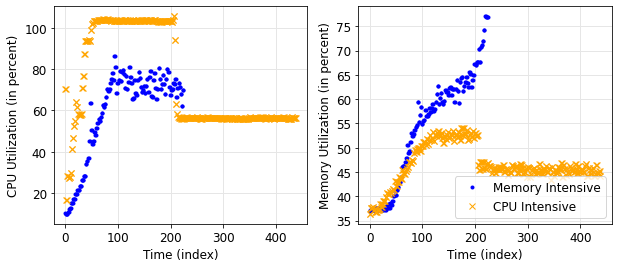

In [26]:
#rcParams['figure.figsize'] = 5, 5
#rcParams["legend.loc"] = 'upper left'
#rcParams['axes.labelsize'] = 10
#rcParams['axes.titlesize'] = 5
#rcParams["font.size"] = 10
#plt.plot(medium['totalcpuUtilization'], color='green',label='MinioDB')
#plt.plot(figletmedium['totalcpuUtilization'], color='red', label='Figlet')
#plt.legend(loc="lower right")
#plt.ylabel('CPU Rate')
#plt.show()


rcParams['figure.figsize'] = 10, 4
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 20
rcParams["font.size"] = 12
rcParams["legend.loc"] = 'lower right'
fig, (ax1, ax2) = plt.subplots(1,2)
#ax1 = plt.subplot(111)


ax1.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax1.set_xlabel("Time (index)")
ax1.set_ylabel("CPU Utilization (in percent)")
ax1.plot(medium['totalcpuUtilization'],'.', label = "Memory Intensive", color="blue")
ax1.plot(senmedium['totalcpuUtilization'], 'x', label = "CPU Intensive", color="orange")

ax2.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax2.set_xlabel("Time (index)")
ax2.set_ylabel("Memory Utilization (in percent)")
ax2.plot(medium['totalmemoryUtilization'],'.', label = "Memory Intensive", color="blue")
ax2.plot(senmedium['totalmemoryUtilization'], 'x', label = "CPU Intensive", color="orange")
plt.legend()
fig.savefig("minio_sentiment_cpurate.pdf",bbox_inches = 'tight',pad_inches = 0,  dpi=300) 


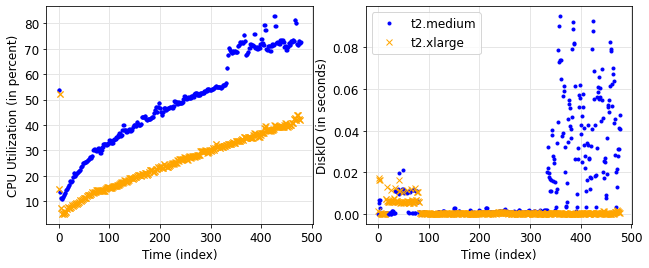

In [27]:
#rcParams['figure.figsize'] = 5, 5
#rcParams["legend.loc"] = 'upper left'
#rcParams['axes.labelsize'] = 10
#rcParams['axes.titlesize'] = 5
#rcParams["font.size"] = 10
#plt.plot(figletxlarge['diskio'], color='green',label='t2.xlarge')
#plt.plot(figletmedium['diskio'], color='red', label='t2.medium')
#plt.legend(loc="upper left")
#plt.ylabel('Disk I/O Rate')
#plt.show()


rcParams['figure.figsize'] = 10.5, 4
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 20
rcParams["font.size"] = 12
rcParams["legend.loc"] = 'upper left'
fig, (ax1, ax2) = plt.subplots(1,2)
#ax1 = plt.subplot(111)


ax1.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax1.set_xlabel("Time (index)")
ax1.set_ylabel("CPU Utilization (in percent)")
ax1.plot(figletmedium['totalcpuUtilization'],'.', label = "t2.medium", color="blue")
ax1.plot(figletxlarge['totalcpuUtilization'], 'x', label = "t2.xlarge", color="orange")


ax2.grid(axis="both", color="0.9", linestyle='-', linewidth=1)
ax2.set_xlabel("Time (index)")
ax2.set_ylabel("DiskIO (in seconds)")
ax2.plot(figletmedium['diskio'],'.', label = "t2.medium", color="blue")
ax2.plot(figletxlarge['diskio'], 'x', label = "t2.xlarge", color="orange")
plt.legend()
fig.savefig("fig_cpu_diskio.pdf",bbox_inches = 'tight',pad_inches = 0,  dpi=300) 

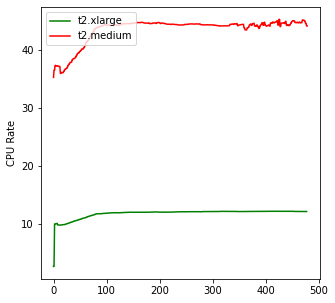

In [44]:
rcParams['figure.figsize'] = 5, 5
rcParams["legend.loc"] = 'upper left'
rcParams['axes.labelsize'] = 10
rcParams['axes.titlesize'] = 5
rcParams["font.size"] = 10
plt.plot(figletxlarge['totalmemoryUtilization'], color='green',label='t2.xlarge')
plt.plot(figletmedium['totalmemoryUtilization'], color='red', label='t2.medium')
plt.legend(loc="upper left")
plt.ylabel('CPU Rate')
plt.show()